<a href="https://colab.research.google.com/github/boleslawkol/Purdue-Notebooks/blob/main/Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Data Wrangling__

## __Agenda__

In this lesson, we will cover the following concepts with the help of examples:
- Introduction
- Data Collection
- Data Inspection
  * Accessing Rows Using .iloc and .loc
  * Checking for Missing Values
  * Handling Missing Data
- Dealing with Duplicates
- Data Cleaning
- Data Transformation
- Data Binning
- Handlig Outliers
- Merging and Joining Data
- Aggregating Data
- Reshaping Data

## __1. Introduction__
Data wrangling, also known as data munging or data preprocessing, is the process of cleaning, structuring, and transforming raw data into a format suitable for analysis.
- It is a crucial step in the data preparation pipeline, aiming to make the data more accessible, understandable, and ready for various analytical tasks.
- It involves dealing with missing values, handling outliers, transforming variables, and merging datasets, among other tasks.

![image.png](attachment:6d3416a5-8a56-44e7-ab1e-8103d4671d20.png)

## __2. Data Collection:__

Data collection is the process of gathering information from diverse sources to build a comprehensive dataset for analysis.
- Sources may include databases, APIs (Application Programming Interfaces), spreadsheets, or external files. Effective data collection ensures the availability of relevant and reliable information.

In [ ]:
# Example with Twitter

import tweepy

# Twitter API credentials
consumer_key = 'YOUR_CONSUMER_KEY'
consumer_secret = 'YOUR_CONSUMER_SECRET'
access_token = 'YOUR_ACCESS_TOKEN'
access_token_secret = 'YOUR_ACCESS_TOKEN_SECRET'

# Authenticate with the Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Collect tweets
tweets = api.search_tweets(q="ProductXYZ", lang="en", count=100)

# Extracting text from tweets
tweets_text = [tweet.text for tweet in tweets]
print(tweets_text[:5])


In [ ]:
# Import data from database
import pyodbc

# Define connector to database
driver = 'SQL Server'
server = 'servername or ip address'
database = 'mydb'
username = 'myusername'
password = 'mypassword'
table = 'mytable'

connector = pyodbc.connect('DRIVER={'+driver+'};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+password)

# Define query
query = 'SELECT * FROM '+table

# Import query results into DataFrame
df = pd.read_sql(query, connector)

# Visit https://github.com/mkleehammer/pyodbc/wiki to learn more about pyobdc and its available drivers

In [ ]:
# Example from webscrapping

# https://colab.research.google.com/drive/1XxFfN0pVaTXqL_aAc7vQRcyQKKR3MijJ

### __Loading Data:__
Start by loading data into a Pandas DataFrame.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


![image.png](attachment:26266d99-6bce-4a56-8544-f0ca458b1b99.png)

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('HousePrices.csv', parse_dates=['date', 'yr_built', 'yr_renovated'])

## __3. Data Inspection__
It involves exploring the dataset to gain insights into its structure and quality.
- This step includes understanding features, data types, and distribution. Checking for missing values, outliers, and inconsistencies is crucial to identify potential issues that need addressing.


Look for:
* Target variable (for supervised learning)
* Is your dataset imbalanced? (for classification)
* Size of dataset (to ensure if fits in memory)
* Number of variables (to estimate model complexity and processing)
* Variable data types (important for choosing visualizations https://python-graph-gallery.com/ --- https://www.data-to-viz.com/ and transformations https://feature-engine.trainindata.com/)
* Missing values
* Cardinality (categorical variables)
* Rare values (categorical variables)
* Distributions (skewness/kurtosis)
* Scale
* Outliers
* Correlations (pay particular attention in correlations with target variable)
    - Pearson (numerical-unordered-gaussian)
    - Spearman (numerical-ordered or unordered-not gaussian)
    - Kendall-Tau (numerical-ordered-not gaussian)
    - V Cramer's (categorical)
* Hypothesis testing


In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   datetime64[ns]
 13  yr_renovated   4600 non-null   object        
 14  street         4600 non-null   object        
 15  city           4600 n

In [ ]:
for col in df.columns:
  if df[col].dtype == 'float64':
    df[col] = df[col].astype('float32')
  elif df[col].dtype == 'int64':
    df[col] = df[col].astype('int16')

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float32
 2   bedrooms       4600 non-null   float32
 3   bathrooms      4600 non-null   float32
 4   sqft_living    4600 non-null   int16  
 5   sqft_lot       4600 non-null   int16  
 6   floors         4600 non-null   float32
 7   waterfront     4600 non-null   int16  
 8   view           4600 non-null   int16  
 9   condition      4600 non-null   int16  
 10  sqft_above     4600 non-null   int16  
 11  sqft_basement  4600 non-null   int16  
 12  yr_built       4600 non-null   int16  
 13  yr_renovated   4600 non-null   int16  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

- The dataset has 18 columns and 4600 rows
- Columns are float32(4), int16(9), object(5)
- Dataset fits in 1.6 MB

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['price'].nunique()

1741

- Target variable identified = `'price'`
- `'price'` is `float32`

- Is your dataset imbalanced? (for classification)

Not applicable as target variable is continuous and we are dealing with a regression problem

In [ ]:
# Inspecting the first few rows of the DataFrame
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519629e+05,3.400870,2.160815,2139.346957,6446.811739,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,9107.897393,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,-32404.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,4400.000000,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7200.000000,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,9734.500000,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,32496.000000,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


**Insights**
- There seem to be no missing values
- All features appear to be skewed to the right (longer right tails) except for `sqft_lot` and `yr_built`
- Scale varies in several orders of magnitude across variables (we might need to scale for linear, neighblrs and other scale-sensitive algorithms)

In [ ]:
df.describe(include='O')

,date,street,city,statezip,country
count,4600,4600,4600,4600,4600
unique,70,4525,44,77,1
top,2014-06-23 00:00:00,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,4,1573,148,4600


**Insights**
- `country` is a constant and can be removed
- `street` has high cardinality which can pose a problem when splitting in train and test. It may not be representative as there are almost as many unique categories as observation. Consider for elimination
- `statezip` combines state and zipcode, it mught be useful to separate `statezip` in 2 different variables for better analysis

In [ ]:
df['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

**Insights**
- For `city` ~70% of observations correspond to ~30% of cities in the dataset
- ~50% of `cities` are infrequent with less than 40 occurances

In [ ]:
df['statezip'].value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

In [ ]:
# Split statezip into state and zip

df[['state', 'zip']] = df['statezip'].str.split(' ', expand=True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,state,zip
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,WA,98133
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,WA,98119
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,WA,98042
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,WA,98008
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,WA,98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,WA,98133
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,WA,98007
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,WA,98059
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,WA,98178


In [ ]:
df['state'].describe()

count     4600
unique       1
top         WA
freq      4600
Name: state, dtype: object

In [ ]:
df['zip'].describe()

count      4600
unique       77
top       98103
freq        148
Name: zip, dtype: object

In [ ]:
df.isnull().mean().sort_values(ascending=False)

date             0.0
price            0.0
statezip         0.0
city             0.0
street           0.0
yr_renovated     0.0
yr_built         0.0
sqft_basement    0.0
sqft_above       0.0
condition        0.0
view             0.0
waterfront       0.0
floors           0.0
sqft_lot         0.0
sqft_living      0.0
bathrooms        0.0
bedrooms         0.0
country          0.0
dtype: float64

**Insights**
- No apparent missing values in our dataset

In [ ]:
df.kurt()

<ipython-input-38-8bd0d54cd88d>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


price            1044.352051
bedrooms            1.235377
bathrooms           1.865905
sqft_living         8.291683
sqft_lot            6.241802
floors             -0.538852
waterfront        134.548673
view               10.464178
condition           0.197730
sqft_above          4.070138
sqft_basement       4.082380
yr_built           -0.670076
yr_renovated       -1.851111
zip                -0.458683
dtype: float64

In [ ]:
df.skew()

<ipython-input-39-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


price            24.790930
bedrooms          0.456446
bathrooms         0.616033
sqft_living       1.723513
sqft_lot         -1.692327
floors            0.551441
waterfront       11.682901
view              3.341586
condition         0.959068
sqft_above        1.494211
sqft_basement     1.642732
yr_built         -0.502155
yr_renovated      0.385919
zip               0.450924
dtype: float64

<Axes: xlabel='price', ylabel='Density'>

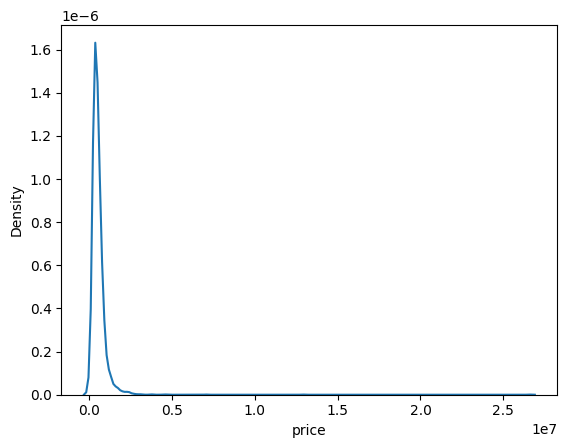

In [ ]:
sns.kdeplot(df['price'])

<Axes: xlabel='sqft_living', ylabel='Density'>

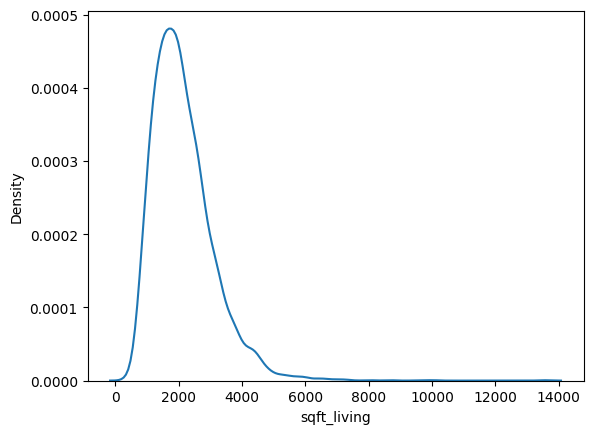

In [ ]:
sns.kdeplot(df['sqft_living'])

<Axes: ylabel='sqft_lot'>

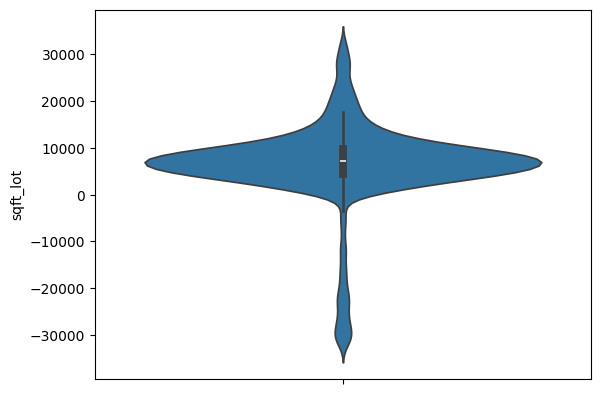

In [ ]:
sns.violinplot(df['sqft_lot'])

<Axes: ylabel='sqft_basement'>

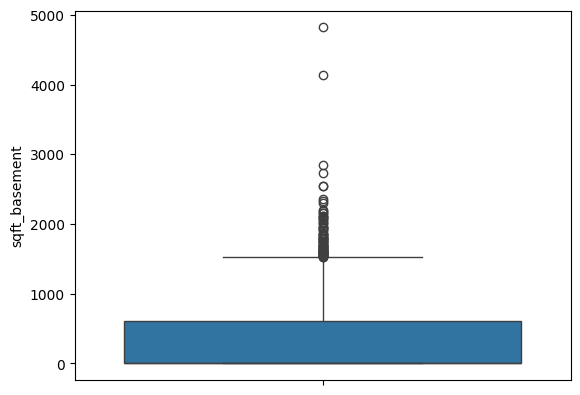

In [ ]:
sns.boxplot(df['sqft_basement'])

In [ ]:
df.corr(method='spearman')

<ipython-input-59-657b2ea90450>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.337863,0.492451,0.631264,-0.031566,0.320929,0.083184,0.267564,0.023843,0.534038,0.236591,0.084415,-0.070935
bedrooms,0.337863,1.000000,0.537882,0.651607,0.168651,0.220267,-0.008774,0.092243,0.006001,0.532720,0.248473,0.159718,-0.056341
bathrooms,0.492451,0.537882,1.000000,0.746818,-0.008001,0.539832,0.049207,0.165425,-0.163474,0.695998,0.189853,0.530261,-0.212800
sqft_living,0.631264,0.651607,0.746818,1.000000,0.158771,0.396749,0.069558,0.249297,-0.066262,0.843412,0.322549,0.322430,-0.126955
sqft_lot,-0.031566,0.168651,-0.008001,0.158771,1.000000,-0.247163,0.063102,0.094669,0.085897,0.124982,0.041681,-0.067048,0.082043
floors,0.320929,0.220267,0.539832,0.396749,-0.247163,1.000000,0.021170,0.019924,-0.303411,0.603723,-0.288010,0.537538,-0.229399
waterfront,0.083184,-0.008774,0.049207,0.069558,0.063102,0.021170,1.000000,0.272121,0.001570,0.052719,0.052983,-0.026801,0.005345
view,0.267564,0.092243,0.165425,0.249297,0.094669,0.019924,0.272121,1.000000,0.061721,0.152727,0.270010,-0.083885,0.027501
condition,0.023843,0.006001,-0.163474,-0.066262,0.085897,-0.303411,0.001570,0.061721,1.000000,-0.183099,0.201031,-0.433361,-0.241569
sqft_above,0.534038,0.532720,0.695998,0.843412,0.124982,0.603723,0.052719,0.152727,-0.183099,1.000000,-0.171684,0.460306,-0.169395


In [ ]:
df.var().sort_values(ascending=False)

<ipython-input-61-78ba29053105>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var().sort_values(ascending=False)


price            3.179096e+11
sqft_lot         8.295379e+07
yr_renovated     9.592528e+05
sqft_living      9.277676e+05
sqft_above       7.433353e+05
sqft_basement    2.154234e+05
yr_built         8.839828e+02
bedrooms         8.260049e-01
bathrooms        6.143128e-01
view             6.059139e-01
condition        4.586402e-01
floors           2.897544e-01
waterfront       7.123997e-03
dtype: float64

In [ ]:
# Inspecting the first few rows of the DataFrame
print(df.head())

# Displaying the last few rows of the DataFrame
print(df.tail())

# Providing information about the DataFrame, including data types and non-null counts
print(df.info())

# Displaying descriptive statistics of the DataFrame, such as mean, std, min, max, etc.
print(df.describe())

# Displaying datatypes of the columns
df.dtypes

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

### __3.1 Accessing Rows Using .iloc and .loc__
Inspecting the dataset involves exploring its content.
- Using .iloc and .loc allows to access specific rows based on integer-location or label-based indexing, respectively.

In [ ]:
# Access the first row using iloc
result_iloc_0 = df.iloc[0]

# Display the result for df.iloc[0]
print("Result for df.iloc[0]:")
print(result_iloc_0)
print()

# Access the eleventh row using iloc
result_iloc_10 = df.iloc[10]

# Display the result for df.iloc[10]
print("Result for df.iloc[10]:")
print(result_iloc_10)


Result for df.iloc[0]:
date              2014-05-02 00:00:00
price                        313000.0
bedrooms                          3.0
bathrooms                         1.5
sqft_living                      1340
sqft_lot                         7912
floors                            1.5
waterfront                          0
view                                0
condition                           3
sqft_above                       1340
sqft_basement                       0
yr_built                         1955
yr_renovated                     2005
street           18810 Densmore Ave N
city                        Shoreline
statezip                     WA 98133
country                           USA
Name: 0, dtype: object

Result for df.iloc[10]:
date             2014-05-02 00:00:00
price                       463000.0
bedrooms                         3.0
bathrooms                       1.75
sqft_living                     1710
sqft_lot                        7320
floors                 

### __3. 2 Checking for Missing Values__
![image.png](attachment:f20aaaeb-a73d-4231-a8de-377f7b3552c8.png)

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


### __3.3 Handling Missing Data__
Handling missing data is crucial for maintaining data integrity. Various approaches include imputation (replacing missing values with estimated values), removal of records with missing values, or using default values when appropriate.
![image.png](attachment:e9798dae-7c21-4ef5-8460-65966bbff52d.png)

In [ ]:
# Handling missing values using imputation
df_filled = df.fillna(df.mean())

/tmp/ipykernel_89/2854573608.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())


## __4. Dealing with Duplicates__

Duplicates in a dataset can introduce bias and errors.
- Identifying and handling duplicate records is essential to ensure accurate analysis and reporting.

![image.png](attachment:f147b453-8d9f-4cb4-b2df-b33746711ed2.png)

In [ ]:
# Removing duplicate records
df_no_duplicates = df.drop_duplicates()

## __5. Data Cleaning__

It involves correcting errors, inconsistencies, and inaccuracies in the dataset.
- Standardizing data formats and units ensures consistency and facilitates analysis.

In [ ]:
# Cleaning data by standardizing formats
df['date'] = pd.to_datetime(df['date'])
# Displaying the DataFrame after cleaning
print("DataFrame after cleaning data by standardizing formats:")
print(df)

DataFrame after cleaning data by standardizing formats:
           date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  3.130000e+05       3.0       1.50         1340      7912   
1    2014-05-02  2.384000e+06       5.0       2.50         3650      9050   
2    2014-05-02  3.420000e+05       3.0       2.00         1930     11947   
3    2014-05-02  4.200000e+05       3.0       2.25         2000      8030   
4    2014-05-02  5.500000e+05       4.0       2.50         1940     10500   
...         ...           ...       ...        ...          ...       ...   
4595 2014-07-09  3.081667e+05       3.0       1.75         1510      6360   
4596 2014-07-09  5.343333e+05       3.0       2.50         1460      7573   
4597 2014-07-09  4.169042e+05       3.0       2.50         3010      7014   
4598 2014-07-10  2.034000e+05       4.0       2.00         2090      6630   
4599 2014-07-10  2.206000e+05       3.0       2.50         1490      8102   

      floors  water

## __6. Data Transformation__

Data transformation includes converting data types, creating new features through feature engineering, and normalizing or scaling numeric values as needed.

In [ ]:
# Creating a new feature and normalizing numeric values
# Check if 'price' column exists in the DataFrame
import numpy as np
if 'price' in df.columns:
    # Use the natural logarithm to create a new feature 'Log_Price'
    df['Log_Price'] = df['price'].apply(lambda x: np.log(x))

    # Normalize 'price' column and create a new feature 'Normalized_Price'
    df['Normalized_Price'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())

    # Displaying the DataFrame with the new features
    print("DataFrame with new features:")
    print(df)
else:
    print("The 'price' column does not exist in the DataFrame.")

DataFrame with new features:
           date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  3.130000e+05       3.0       1.50         1340      7912   
1    2014-05-02  2.384000e+06       5.0       2.50         3650      9050   
2    2014-05-02  3.420000e+05       3.0       2.00         1930     11947   
3    2014-05-02  4.200000e+05       3.0       2.25         2000      8030   
4    2014-05-02  5.500000e+05       4.0       2.50         1940     10500   
...         ...           ...       ...        ...          ...       ...   
4595 2014-07-09  3.081667e+05       3.0       1.75         1510      6360   
4596 2014-07-09  5.343333e+05       3.0       2.50         1460      7573   
4597 2014-07-09  4.169042e+05       3.0       2.50         3010      7014   
4598 2014-07-10  2.034000e+05       4.0       2.00         2090      6630   
4599 2014-07-10  2.206000e+05       3.0       2.50         1490      8102   

      floors  waterfront  view  condition  sqf

## __7. Data Binning__
Data binning, also known as discretization, is a technique used in data transformation to convert continuous numerical data into discrete bins or intervals.
- This process helps simplify the analysis of trends, handle outliers, and make data more suitable for certain types of analyses or machine learning algorithms.
- It involves grouping numeric values into predefined ranges, creating a categorical representation of the data.

In [ ]:
# Data Binning: Creating bins for the 'price' column
# Check if 'price' column exists in the DataFrame
if 'price' in df.columns:
    # Define bin edges
    bin_edges = [0, 100, 200, 300, 400, 500, np.inf]  # Adjust bin edges as needed

    # Define bin labels
    bin_labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501+']

    # Create a new categorical column 'Price_Category' based on binning
    df['Price_Category'] = pd.cut(df['price'], bins=bin_edges, labels=bin_labels, right=False)

    # Displaying the DataFrame with the new 'Price_Category' column
    print("DataFrame with Price_Category column:")
    print(df)
else:
    print("The 'price' column does not exist in the DataFrame.")


DataFrame with Price_Category column:
           date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  3.130000e+05       3.0       1.50         1340      7912   
1    2014-05-02  2.384000e+06       5.0       2.50         3650      9050   
2    2014-05-02  3.420000e+05       3.0       2.00         1930     11947   
3    2014-05-02  4.200000e+05       3.0       2.25         2000      8030   
4    2014-05-02  5.500000e+05       4.0       2.50         1940     10500   
...         ...           ...       ...        ...          ...       ...   
4595 2014-07-09  3.081667e+05       3.0       1.75         1510      6360   
4596 2014-07-09  5.343333e+05       3.0       2.50         1460      7573   
4597 2014-07-09  4.169042e+05       3.0       2.50         3010      7014   
4598 2014-07-10  2.034000e+05       4.0       2.00         2090      6630   
4599 2014-07-10  2.206000e+05       3.0       2.50         1490      8102   

      floors  waterfront  view  condi

## __8. Handling Outliers__

Outliers can significantly impact analysis and modeling. Identifying and addressing outliers is crucial for maintaining the accuracy of results.

In [ ]:
# Handling outliers by winsorizing
from scipy.stats.mstats import winsorize

# Check if 'price' column exists in the DataFrame
if 'price' in df.columns:
    # Winsorizing the 'price' column with limits [0.05, 0.05]
    df['Winsorized_Price'] = winsorize(df['price'], limits=[0.05, 0.05])

    # Displaying the DataFrame with the winsorized column
    print("DataFrame with winsorized column:")
    print(df)
else:
    print("The 'price' column does not exist in the DataFrame.")

DataFrame with winsorized column:
           date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  3.130000e+05       3.0       1.50         1340      7912   
1    2014-05-02  2.384000e+06       5.0       2.50         3650      9050   
2    2014-05-02  3.420000e+05       3.0       2.00         1930     11947   
3    2014-05-02  4.200000e+05       3.0       2.25         2000      8030   
4    2014-05-02  5.500000e+05       4.0       2.50         1940     10500   
...         ...           ...       ...        ...          ...       ...   
4595 2014-07-09  3.081667e+05       3.0       1.75         1510      6360   
4596 2014-07-09  5.343333e+05       3.0       2.50         1460      7573   
4597 2014-07-09  4.169042e+05       3.0       2.50         3010      7014   
4598 2014-07-10  2.034000e+05       4.0       2.00         2090      6630   
4599 2014-07-10  2.206000e+05       3.0       2.50         1490      8102   

      floors  waterfront  view  condition

## __9. Merging and Joining Data__

Merging and joining involve combining data from multiple sources: ensuring proper alignment based on common columns is essential for accurate analysis.

![image.png](attachment:82851bd8-395b-4867-9a67-66d3bbd1d131.png)

In [ ]:
import pandas as pd

# Assuming you have two DataFrames df1 and df2 with a common column 'common_column'
# Adjust column names and DataFrames based on your actual data

# DataFrames
df1 = pd.DataFrame({'Common_column': [1, 2, 3], 'Data1': ['A', 'B', 'C']})
df2 = pd.DataFrame({'Common_column': [2, 3, 4], 'Data2': ['X', 'Y', 'Z']})

# Merging DataFrames based on the common column with an inner join
merged_df = pd.merge(df1, df2, on='Common_column', how='inner')

# Displaying the merged DataFrame
print("Merged DataFrame:")
print(merged_df)

Merged DataFrame:
   Common_column Data1 Data2
0              2     B     X
1              3     C     Y


## __10. Aggregating Data__

Aggregating data involves summarizing or grouping data based on specific criteria. This is useful for creating meaningful insights and reducing data dimensionality.

In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' with a 'Category' column
# Adjust column names and DataFrame based on your actual data

# DataFrame
df = pd.DataFrame({'Category': ['A', 'B', 'A', 'B', 'A'],
                   'Value': [10, 15, 20, 25, 30]})

# Aggregating data by calculating average values based on 'Category'
df_aggregated = df.groupby('Category').mean()

# Displaying the aggregated DataFrame
print("Aggregated DataFrame:")
print(df_aggregated)



Aggregated DataFrame:
          Value
Category       
A          20.0
B          20.0


## __11. Reshaping Data__

Reshaping data includes pivoting, melting, or stacking data to achieve a structure suitable for specific analyses or visualizations.

![image.png](attachment:44303e0c-c1fa-4a46-889a-f8ca53415f28.png)

In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' with 'Date', 'Category', and 'Value' columns
# Adjust column names and DataFrame based on your actual data

# DataFrame
df = pd.DataFrame({'Date': ['2022-01-01', '2022-01-01', '2022-01-02', '2022-01-02'],
                   'Category': ['A', 'B', 'A', 'B'],
                   'Value': [10, 15, 20, 25]})

# Pivoting data for better analysis
df_pivoted = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='mean')

# Displaying the pivoted DataFrame
print("Pivoted DataFrame:")
print(df_pivoted)

Pivoted DataFrame:
Category     A   B
Date              
2022-01-01  10  15
2022-01-02  20  25


# __Assisted Practice__

## __Problem Statement:__

The complexity of the housing market can be overwhelming. For a data scientist at a real estate company, the responsibility lies in analyzing housing data to uncover insights into house prices. The goal is to comprehend the elements influencing house prices and the impact of various house features on its price. This understanding aids the company in navigating the housing market more effectively and making well-informed decisions when purchasing and selling houses.

## __Steps to Perform:__

- Understand the structure of the dataset, the types of variables, and any obvious issues in the data
- Check for duplicate entries in the dataset and decide how to handle them
- Identify and handle missing values. Decide whether to fill them in or drop them based on the context
- Apply necessary transformations to the variables. This could include scaling numerical variables or encoding categorical variables
- For continuous variables, consider creating bins to turn them into categorical variables. For example, you can bin the __YearBuilt__ feature into decades
- Identify outliers in the dataset and decide on a strategy to handle them. You can use a box plot to visualize outliers in features like __LotArea__ or __SalePrice__